1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

2. Anda diperbolehkan melakukan eksplorasi terhadap,
  * Metode pra pengolahan
  * Pemilihan fitur
  * Arsitektur ANN
  * Fungsi Aktiviasi

3. ANN diimplementasikan dengan menggunakan tensorflow.

4. DIKERJAKAN SECARA BERKELOMPOK

5. JELASKAN HASIL YANG ANDA DAPATKAN,
  * AKURASI
  * CONFUSION MATRIX
  * KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

* Import library

In [200]:
import cv2   # it will allow us to load our images into the script
import numpy as np   # used for reformatting our own images
import tensorflow as tf   # main library used to load data sets, build neural networks, train them, etc.
import matplotlib.pyplot as plt   # used for visualization
from collections import Counter

* Download dataset mnist

In [201]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


* melihat dimensi data

In [202]:
# Melihat dimensi data
print("Jumlah sampel:", mnist.data.shape[0])  # Jumlah sampel/data points
print("Dimensi setiap sampel:", mnist.data.shape[1])  # Dimensi setiap sampel
print("Jumlah kelas:", len(mnist.target.unique()))

Jumlah sampel: 70000
Dimensi setiap sampel: 784
Jumlah kelas: 10


* Eksplorasi Data MNIST

In [203]:
# 1. Eksplorasi Dataset
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")



Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


* Data preparation

Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


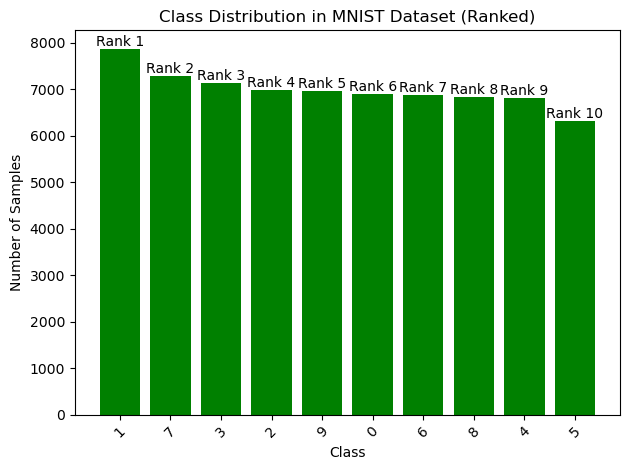

In [204]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract features and labels
x, y = mnist.data, mnist.target.astype(int)

# Count the Class Frequencies
class_counts = Counter(y)
print(class_counts)

# Sort the class_counts in descending order
sorted_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

# Extract class labels and counts
class_labels = [str(key) for key in sorted_counts.keys()]
counts = list(sorted_counts.values())

# Create a bar chart with green bars
plt.bar(class_labels, counts, color='green')

# Add ranking as text on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, f"Rank {i+1}", ha='center', va='bottom', fontsize=10)

plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset (Ranked)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


* Split data

In [205]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print('The shape of the training inputs:', x_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',x_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (56000, 784)
The shape of the training labels: (56000,)
The shape of the testing inputs: (14000, 784)
The shape of the testing labels: (14000,)


* Print 10 first image

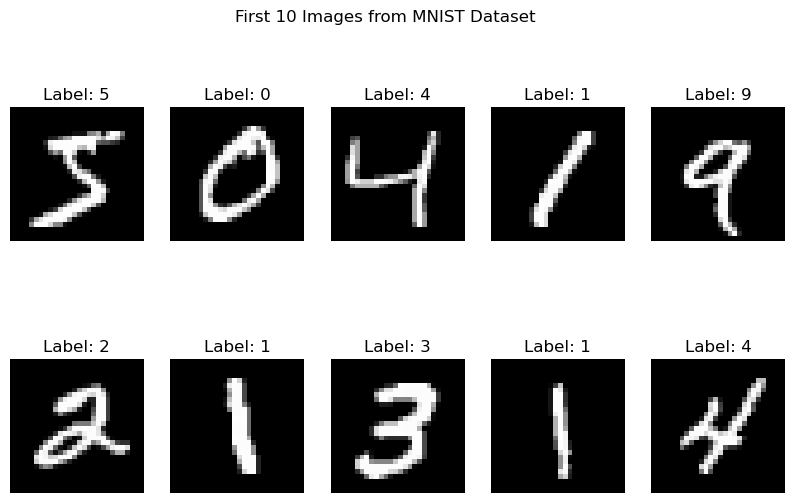

In [206]:
# Convert x to a NumPy array
x_convert = x.values.astype(int)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns, and i+1-th subplot
    plt.imshow(x_convert[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')  # Turn off axis labels

plt.suptitle('First 10 Images from MNIST Dataset')
plt.show()

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [207]:
# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


# process the data before training
# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# build the model ANN
model = tf.keras.models.Sequential()

# build layers
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))  # 10 classes for MNIST

# compile the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               100480    
                                                                 
 dense_61 (Dense)            (None, 128)               16512     
                                                                 
 dense_62 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Compiling Model
Before we start training and testing our model, we need to compile it first. This optimizes it and we can also choose a loss function.

An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

In [208]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [209]:
model.fit(x_train, y_train, epochs=25, batch_size=100, validation_data=(x_test, y_test))

Epoch 1/25
560/560 [==============================] - 3s 3ms/step - loss: 2.0495 - accuracy: 0.2363 - val_loss: 1.4775 - val_accuracy: 0.4446
Epoch 2/25
560/560 [==============================] - 2s 3ms/step - loss: 1.2702 - accuracy: 0.5189 - val_loss: 1.1627 - val_accuracy: 0.5671
Epoch 3/25
560/560 [==============================] - 2s 4ms/step - loss: 1.0787 - accuracy: 0.6194 - val_loss: 1.0080 - val_accuracy: 0.6576
Epoch 4/25
560/560 [==============================] - 2s 4ms/step - loss: 0.9021 - accuracy: 0.7061 - val_loss: 0.8183 - val_accuracy: 0.7306
Epoch 5/25
560/560 [==============================] - 2s 4ms/step - loss: 0.7705 - accuracy: 0.7477 - val_loss: 0.7551 - val_accuracy: 0.7522
Epoch 6/25
560/560 [==============================] - 2s 4ms/step - loss: 0.7140 - accuracy: 0.7671 - val_loss: 0.7014 - val_accuracy: 0.7729
Epoch 7/25
560/560 [==============================] - 2s 4ms/step - loss: 0.6821 - accuracy: 0.7812 - val_loss: 0.6695 - val_accuracy: 0.7847
Epoch 

* Model Evaluation

In [210]:

loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)


438/438 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.9031
0.33243000507354736
0.9031428694725037


438/438 [==============================] - 1s 2ms/step


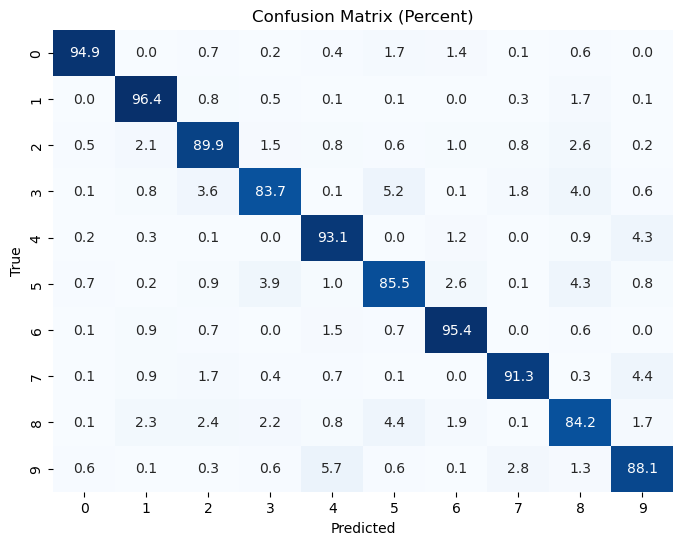

In [211]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained your model and have predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred_classes)

# Convert counts to percentages
confusion_percent = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap with percentages
sns.heatmap(confusion_percent, annot=True, fmt='.1f', cmap='Blues', cbar=False, ax=ax)

# Set labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix (Percent)')

# Add class labels to the x and y axis
class_labels = [str(i) for i in range(10)]  # Assuming you have 10 classes
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Display the plot
plt.show()